In [2]:
using Pkg, Revise
Pkg.activate(joinpath(@__DIR__,"../.."))
using EasyABM

  Activating project at `~/Documents/EasyABM`


WebIO._IJuliaInit()

In [65]:
n=20

20

In [66]:
graph = square_grid_graph(n,n);

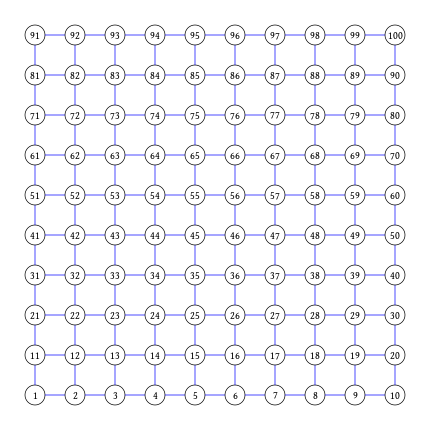

In [31]:
draw_graph(graph, mark_nodes=true)

In [71]:
model = create_graph_model(graph, open_nodes=Int[], percolated=false, prob=0.0, graphics=false)

EasyABM GraphModel{EasyABM.StaticType, EasyABM.StaticType, EasyABM.SimGType}: In a {EasyABM.StaticType, EasyABM.StaticType} model both graph topology and agents number is fixed.


In [48]:
last_node = n^2

400

In [73]:
function initialiser!(model)
    model.properties.num_nodes=length(vertices(model.graph))
    for node in vertices(model.graph)
        if node==model.properties.num_nodes
            model.graph.nodesprops[node].open=true
            model.graph.nodesprops[node].color=cl"blue"
        else
            model.graph.nodesprops[node].open=false
            model.graph.nodesprops[node].color=cl"black"
        end   
    end
    push!(model.properties.open_nodes, model.properties.num_nodes) #last node is open
    model.properties.percolated=false
end
init_model!(model, initialiser= initialiser!, props_to_record = Dict("nodes"=>Set([:color])))

In [74]:
function let_water_out!(node, model)
    water_source_nodes=[node]
    loop_condition = true
    n = model.properties.num_nodes
    while length(water_source_nodes)>0 && loop_condition
        nd = pop!(water_source_nodes)
        nbrs = neighbor_nodes(nd, model)
        for nbr in nbrs
            if (model.graph.nodesprops[nbr].open)&&(model.graph.nodesprops[nbr].color==cl"white")
                model.graph.nodesprops[nbr].color = cl"blue"
                if (nbr<=sqrt(n))
                    model.properties.percolated=true
                    model.properties.prob = length(model.properties.open_nodes)/n
                    loop_condition=false
                    break
                end
                push!(water_source_nodes, nbr)
            end
        end   
    end
end

function let_water_in!(node, model)
    nbrs = neighbor_nodes(node, model)     
    n=model.properties.num_nodes
    for nbr in nbrs
        if model.graph.nodesprops[nbr].open && (model.graph.nodesprops[nbr].color==cl"blue")
            model.graph.nodesprops[node].color = cl"blue"
            if (node<=sqrt(n))
                model.properties.percolated=true
                model.properties.prob = length(model.properties.open_nodes)/n
                return 
            end
            break
        end
    end
end



function step_rule!(model)
    num=0
    n=model.properties.num_nodes
    percolated = model.properties.percolated
    #open 10 nodes per step
    while (num<10) && (length(model.properties.open_nodes)<n) && (!percolated)
        node = rand(1:n)
        if !(model.graph.nodesprops[node].open)
            num+=1
            model.graph.nodesprops[node].open = true
            push!(model.properties.open_nodes, node)
            if (node<=n)&&(node>=(n-sqrt(n)+1))#upper most row
                model.graph.nodesprops[node].color=cl"blue"
            else
                model.graph.nodesprops[node].color=cl"white"
                let_water_in!(node, model)
            end 
            if (model.graph.nodesprops[node].color == cl"blue") && !(model.properties.percolated)
                let_water_out!(node, model)
            end
            percolated = model.properties.percolated      
        end
    end
    
end

step_rule! (generic function with 1 method)

In [70]:
run_model!(model, steps=50, step_rule = step_rule! )

LoadError: KeyError: key 73951 not found

In [44]:
animate_sim(model)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["time"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(26), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/home/dushya/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/home/dushya/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007f4cd60ce270, Task (runnable) @0x00007f4cd60ce270), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 482922754160, 3)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n  

In [19]:
model.properties.percolated

false

In [12]:
model1.graph.nodesprops[190].color

Col(1.0N0f8,0.0N0f8,0.0N0f8,1.0N0f8)


In [75]:
function calculate_percolation_probability(;grid_size=20, attempts=10)
    n=grid_size
    frames=Int(ceil(n^2/10)) # every step 10 random nodes are inverted
    percolation_probs = Float64[]
    for _ in 1:attempts
        graph = square_grid_graph(n,n)
        model = create_graph_model(graph, open_nodes=Int[], percolated=false, graphics=false, prob=0.0) 
        init_model!(model, initialiser= initialiser!)
        run_model!(model, steps=frames, step_rule = step_rule! )
        if model.properties.percolated
            push!(percolation_probs, model.properties.prob)
        end
    end
    percolation_probs
end

calculate_percolation_probability (generic function with 1 method)

In [91]:
probs=calculate_percolation_probability(grid_size=20, attempts=80);

In [92]:
sum(probs)/length(probs)

0.5919687499999999